### 计算机模拟HW4
**3180105843 汪奕晨**

In [14]:
from scipy import stats
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.io as scio
import time

In [84]:
def swapcities(cityXY):
    n = cityXY.shape[1]
    city = np.random.choice(n, 2, False)
    city_1 = min(city)
    city_2 = max(city)

    s = np.hstack((cityXY[:,0: city_1], cityXY[:,city_2:city_1:-1]))
    s = np.hstack((s, cityXY[:,city_1:city_1 + 1]))
    # 这里使用了加一使得得到的矩阵的列宽为1，否则使用.shape会输出列宽为空，可以防止hstack报错 dimention 不一致
    s = np.hstack((s, cityXY[:,city_2 + 1:]))
    return s


def dis2(x, y):
    d0 = x[0] - y[0]
    d1 = x[1] - y[1]
    d = d0 * d0 + d1 * d1
    # dis2 已经是一个
    return np.sqrt(d)


def distance(cityXY):
    # d = 0
    n = cityXY.shape[1]

    dd = dis2(cityXY[:,:-1], cityXY[:, 1:])
    d = np.sum(dd)
    #使用向量化可以极大地提高计算速度

    # for i in range(n - 1):
    #     d = d + dis2(cityXY[:, i], cityXY[:, i + 1])
    d += dis2(cityXY[:, n - 1], cityXY[:, 0])
    return d


def TSPSA(cityXY, T0, MAXIT, N):
    k = 0
    t = T0
    # x = cityXY.copy()
    x = cityXY
    dx = distance(x)
    ds = dx

    # n = x.shape[1]
    # xs = x.copy()
    # ds = distance(x)
    # ds = dx.copy()
    for i in range(N):
        while (k < MAXIT):
            # dx = distance(x)
            if (dx < ds):
                xs = x.copy()
                ds = dx
            y = swapcities(x)
            dy = distance(y)
            h = min(1, np.exp(-(dy - dx)/t))
            U = np.random.rand()
            if (U < h):
                # x = y.copy()
                x = y
                dx = dy
            k = k + 1
        # print(distance(x), t)
        # t = t * a; 弃用的降温方法
        t *= (1 - 1 / (50 + np.log(i + 1)))
        k = 0
    return xs


def plotcities(cityXY):
    plt.figure()
    plt.plot(cityXY[0, :], cityXY[1, :], 'b*')
    plt.plot(cityXY[0, :], cityXY[1, :], 'b')
    plt.plot([cityXY[0, -1:], cityXY[0, 0]], [cityXY[1, -1:], cityXY[1, 0]], 'b')
    plt.show()


def moduletest(cities, T0, MAXIT, N):
    time_start = time.time()
    x = TSPSA(cities, T0, MAXIT, N)
    time_end = time.time()
    dist = distance(x)
    return dist, time_end - time_start, x




In [85]:
cityXY = scio.loadmat('cityXY.mat')
cityXY = cityXY['cityXY']

In [86]:
dist, t, x = moduletest(cityXY, 20, 2000, 600)

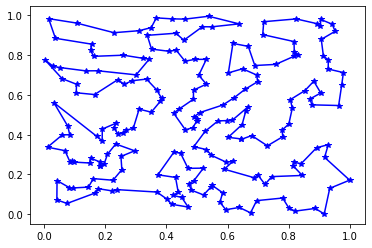

In [87]:
plotcities(x)

In [88]:
dist

11.313637904344585

In [79]:
a = [1,2,3]

In [80]:
b = a

In [81]:
a = [4,5,6]

In [82]:
b

[1, 2, 3]